# Flongle Experiments


In [35]:
from read_clustering.variant_call import VariantCalls
threshold = 0.5
import pandas as pd
import numpy as np

In [2]:
ivt_path = "/Users/andrewbailey/CLionProjects/read_clustering/data/inference/variant_calls/canonical_ivt_round30_alt_canonical_supervised_500_500.model.csv"
cbf5_glu_psu_depletion_path = "/Users/andrewbailey/CLionProjects/read_clustering/data/inference/variant_calls/depletion_cbf5_glu_round30_alt_canonical_supervised_500_500.model.csv"
nop58_glu_2o_depletion_path = "/Users/andrewbailey/CLionProjects/read_clustering/data/inference/variant_calls/depletion_nop58_glu_round30_alt_canonical_supervised_500_500.model.csv"       
native_cbf5_gal_path = "/Users/andrewbailey/CLionProjects/read_clustering/data/inference/variant_calls/native_cbf5_gal_round30_alt_canonical_supervised_500_500.model.csv"
native_nop58_gal_path = "/Users/andrewbailey/CLionProjects/read_clustering/data/inference/variant_calls/native_nop58_gal_round30_alt_canonical_supervised_500_500.model.csv"

file_paths = [ivt_path, cbf5_glu_psu_depletion_path, nop58_glu_2o_depletion_path, native_cbf5_gal_path, native_nop58_gal_path]
labels = ["ivt", "cbf5_glu_psu_depletion", "nop58_glu_2o_depletion", "native_cbf5_gal", "native_nop58_gal"]

In [14]:
# depletion
native_cbf5_gal = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/small_5mer/test_with_depletions/train_500_test_500_prob_0.7_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false_small_model_5mer_use_median_true_min_sd_0/all_variant_calls/template_hmm30/native_cbf5_gal.csv"   

In [15]:
# YWD448a
YWD448a = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/YWD448a/signalalign_output/variant_calls/YWD448a.csv"
file_paths.append(YWD448a)
labels.append("YWD448a")
file_paths = [YWD448a, native_cbf5_gal]
labels = ["YWD448a", "native_cbf5_gal"]

In [16]:
vc = VariantCalls(file_paths, labels)


/Users/andrewbailey/CLionProjects/read_clustering/src/read_clustering/variant_call.py:799: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["umap_result_x"] = umap_results[:, 0]
/Users/andrewbailey/CLionProjects/read_clustering/src/read_clustering/variant_call.py:800: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["umap_result_y"] = umap_results[:, 1]


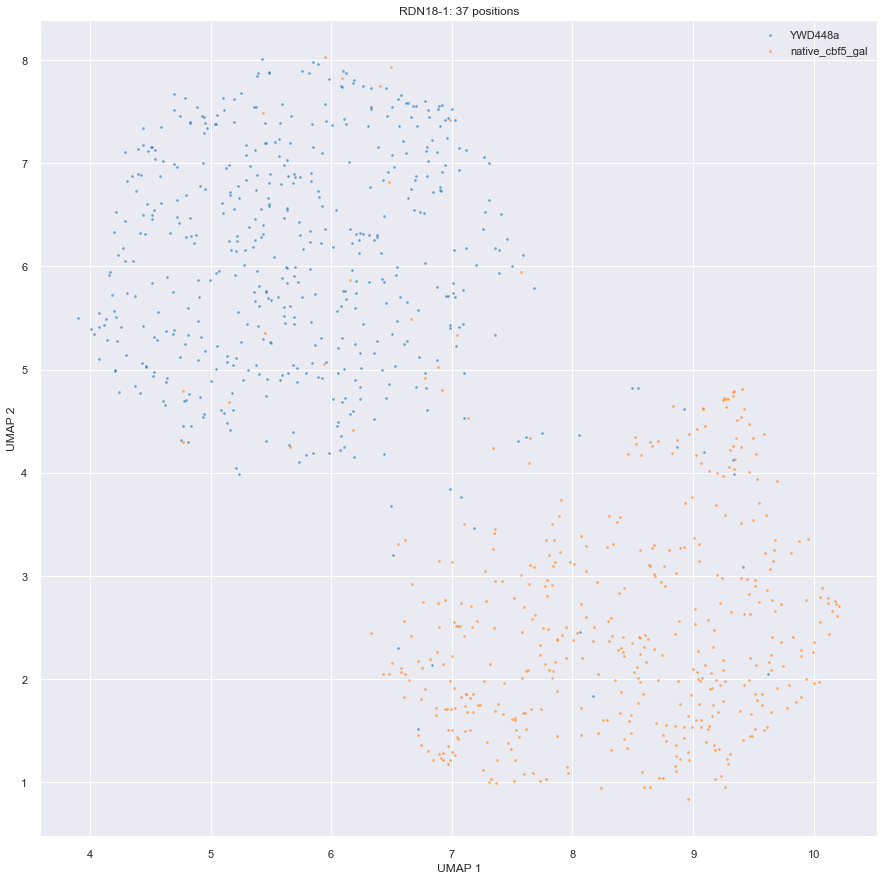

In [19]:
contig = 'RDN18-1'
n_components = 2
# save_fig_path = None
save_fig_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/figures/flongle/YWD448a/native_vs_YWD448a_18S.png"
vc.plot_UMAP_by_label(contig, vc.get_contig_positions(contig), n_components=n_components, figure_path=save_fig_path)

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


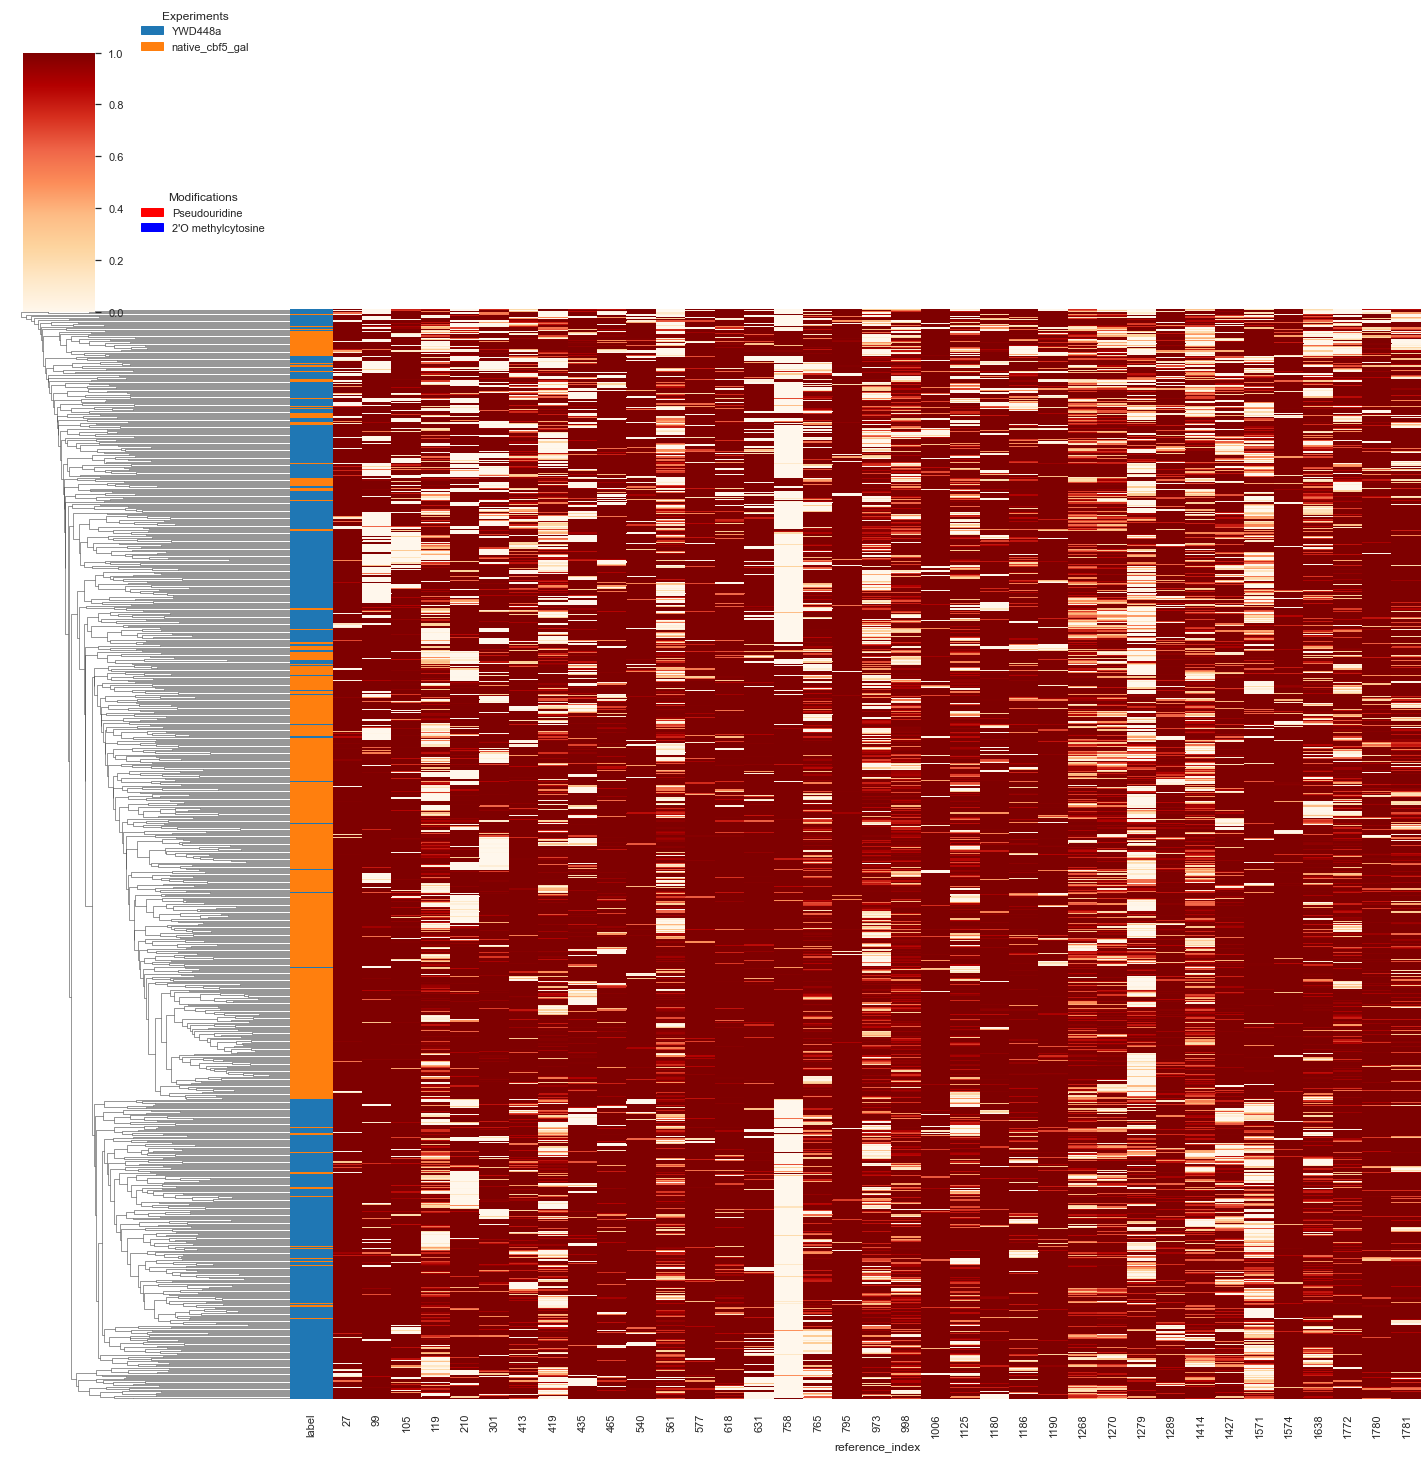

In [23]:
n = -1
figure_path = None
metric = 'euclidean'
method = 'average'
contig = 'RDN18-1'
figure_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/figures/flongle/YWD448a/native_vs_YWD448a_18S.png"

vc.plot_heatmap_dendrogram(contig, vc.get_contig_positions(contig), n=n, figure_path=figure_path,
                          metric=metric,
                          method=method, col_cluster=False)


In [ ]:
contig = 'RDN25-1'
n_components = 2
save_fig_path=None
vc.plot_UMAP_by_label(contig, vc.get_contig_positions(contig), n_components=n_components, figure_path=save_fig_path)

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


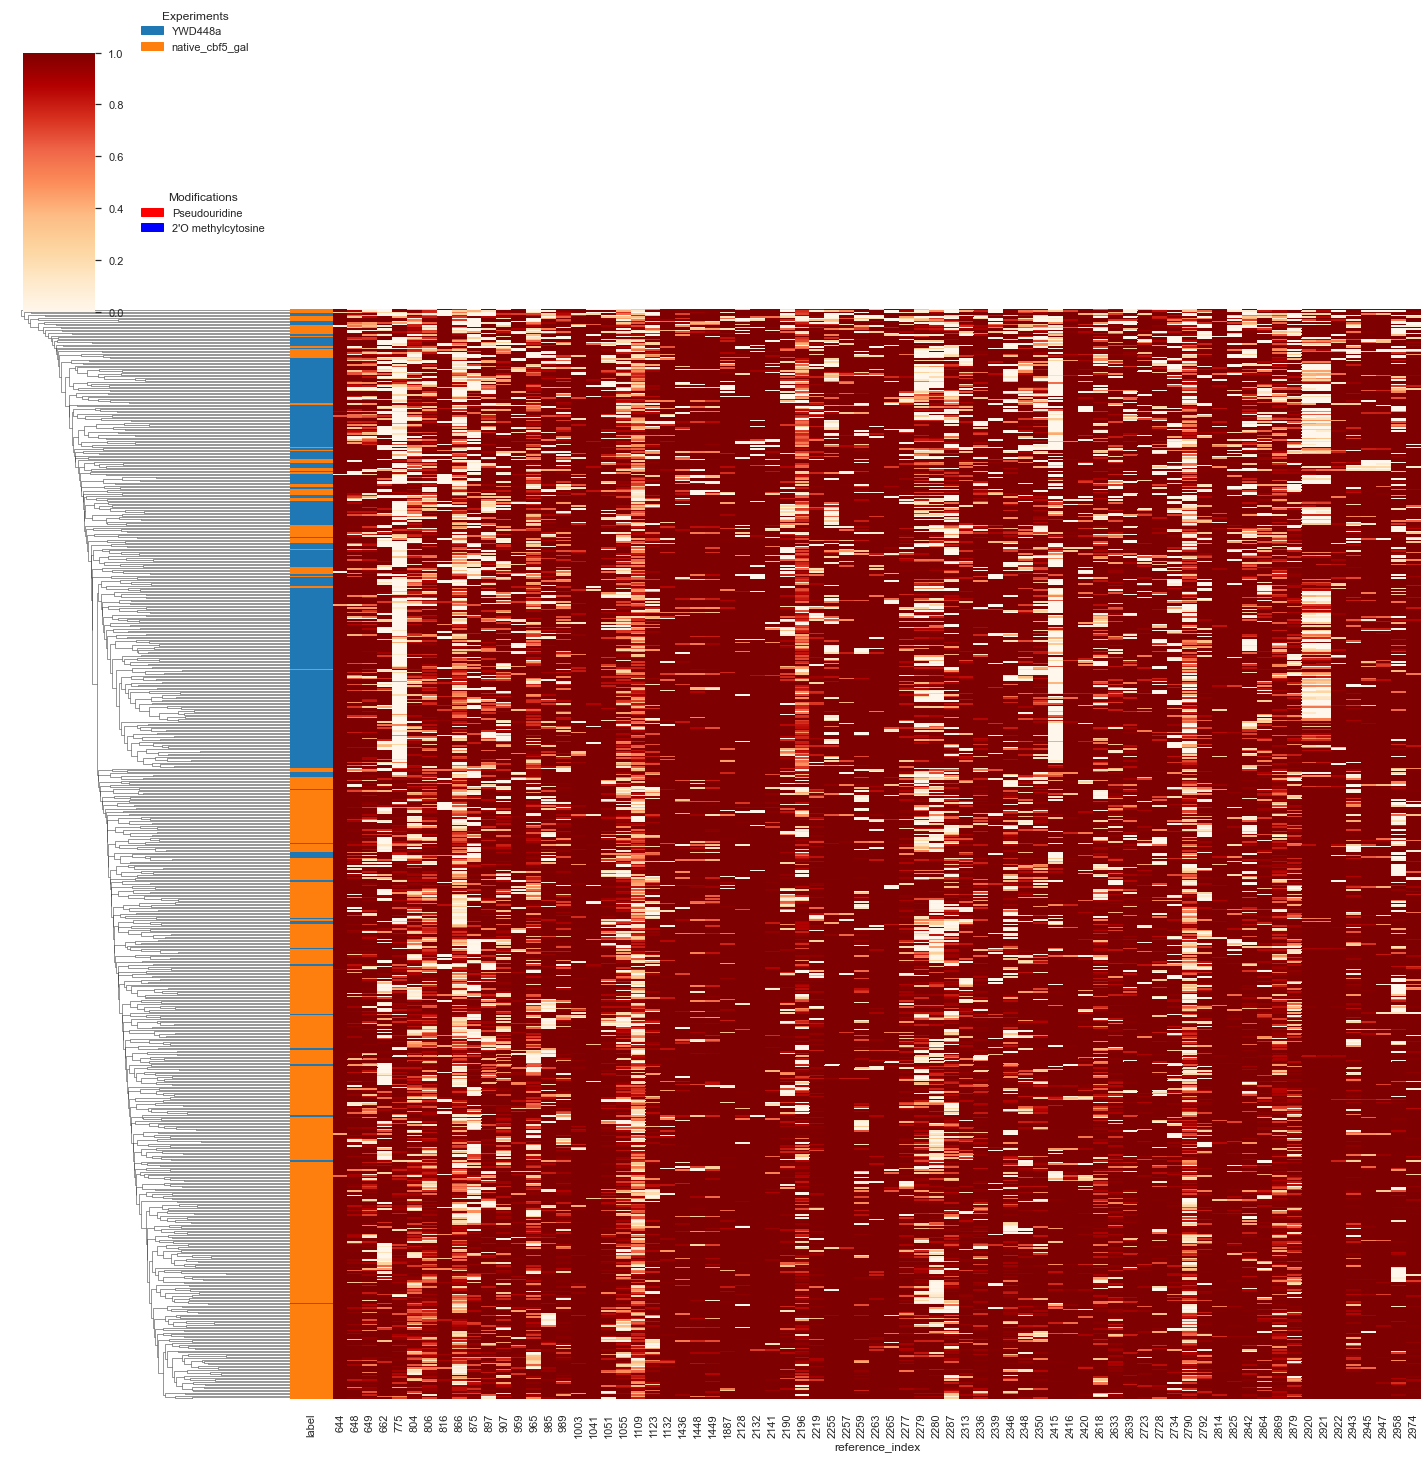

In [24]:
n = -1
# figure_path = None
figure_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/figures/flongle/YWD448a/native_vs_YWD448a_25S.png"
metric = 'euclidean'
method = 'average'
contig = 'RDN25-1'

vc.plot_heatmap_dendrogram(contig, vc.get_contig_positions(contig), n=n, figure_path=figure_path,
                          metric=metric,
                          method=method, col_cluster=False)


In [44]:
contig = 'RDN25-1'
contig = 'RDN18-1'

positions = vc.get_contig_positions(contig)
data = vc.data[(vc.data["contig"] == contig) & (vc.data['reference_index'].isin(positions))]
df = data.pivot(index=['read_id', 'label'], columns=['reference_index'], values='prob2')
X = df.dropna()
print(np.sum(pd.DataFrame(X.index.get_level_values(1))["label"] == "YWD448a"))
data = vc.data[(vc.data["contig"] == contig)]
df = data.pivot(index=['read_id', 'label'], columns=['reference_index'], values='prob2')
X = df.dropna()
print(np.sum(pd.DataFrame(X.index.get_level_values(1))["label"] == "YWD448a"))

493
493


270

In [47]:
len(set(vc.data[(vc.data["contig"] == contig)]["read_id"]))


1362